In [1]:
import os, json
import pandas as pd

In [89]:
PATH = "..\\tubs\\tub_filtered_mute2Effective"

In [90]:
json_files = [file for file in os.listdir(PATH) if file.endswith('json') ]

In [91]:
len(json_files)

2376

In [92]:
meta_json = pd.read_json(f'{PATH}/{json_files[0]}')

In [93]:
meta_json

,types,inputs
0,image_array,cam/image_array
1,float,pilot/angle
2,float,angle
3,float,throttle
4,str,user/mode
5,str,timestamp
6,boolean,filtered


In [106]:
df = pd.DataFrame()
i = 0
for i, j in enumerate(json_files[1:None]):
    with open(f'{PATH}/{j}') as f:
        try:
            data = json.load(f)
        except:
            pass
        
        Throttle = data["throttle"]
        pilotAngle = data["pilot/angle"]
        filtered = data["filtered"]
        angle = data["angle"]
        camImage_array = data["cam/image_array"]
        index = int(camImage_array[:-21])
        df_row = pd.DataFrame([[Throttle, pilotAngle, angle, filtered, camImage_array]], index = [index], 
                              columns = ["throttle", "pilot/angle", "angle", "filtered", "cam/image_array"])
        
        df = df.append(df_row)
df = df.sort_index()

In [107]:
len(df)

2375

In [108]:
df = df.sort_index()

In [109]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [110]:
df.head()

,throttle,pilot/angle,angle,filtered,cam/image_array
0,0.3,0.857143,0.857143,False,0_cam-image_array_.jpg
1,0.3,0.857143,0.857143,False,1_cam-image_array_.jpg
2,0.3,0.857143,0.857143,False,2_cam-image_array_.jpg
3,0.3,0.571429,0.571429,False,3_cam-image_array_.jpg
4,0.3,0.571429,0.571429,False,4_cam-image_array_.jpg


In [111]:
df_filtered = df[df["filtered"]==True]

In [112]:
len(df_filtered)

125

In [115]:
df_filtered[:30]

,throttle,pilot/angle,angle,filtered,cam/image_array
40,0.3,0.571429,-0.571429,True,40_cam-image_array_.jpg
42,0.3,-0.142857,-0.714286,True,42_cam-image_array_.jpg
44,0.3,-1.000000,0.000000,True,44_cam-image_array_.jpg
49,0.3,0.714286,-0.714286,True,49_cam-image_array_.jpg
54,0.3,0.714286,-0.857143,True,54_cam-image_array_.jpg
107,0.3,-0.714286,-0.142857,True,107_cam-image_array_.jpg
111,0.3,1.000000,-0.428571,True,111_cam-image_array_.jpg
114,0.3,0.000000,-0.857143,True,114_cam-image_array_.jpg
121,0.3,0.000000,-0.571429,True,121_cam-image_array_.jpg
139,0.3,0.000000,0.857143,True,139_cam-image_array_.jpg


C:\Users\allace\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


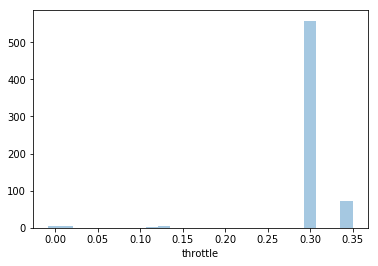

In [23]:
sns.distplot(df["throttle"], kde=False)

C:\Users\allace\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


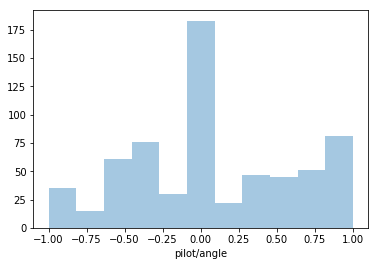

In [24]:
sns.distplot(df["pilot/angle"], kde=False)

C:\Users\allace\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\allace\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


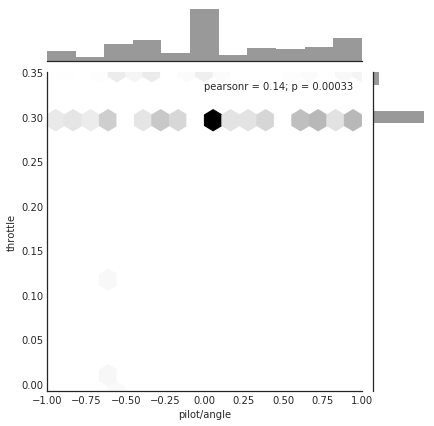

In [25]:
with sns.axes_style("white"):
    sns.jointplot(x=df["pilot/angle"], y=df["throttle"], kind="hex", color="k")

In [55]:
df_x = df.drop(labels=["cam/image_array"], axis = 1)

In [56]:
df_x.head()

,user/throttle,user/angle
0,0.08,0.01
1,0.12,-0.03
10,0.25,-0.23
11,0.25,-0.23
12,0.24,-0.23


C:\Users\Jason\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


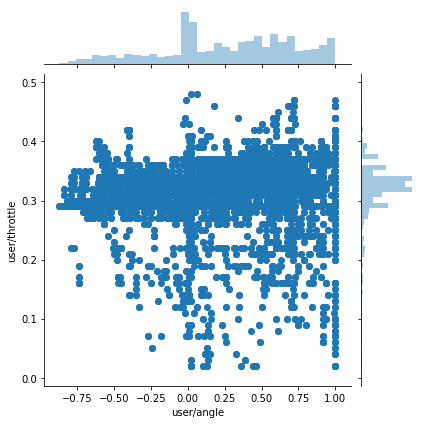

In [57]:
sns.jointplot(x="user/angle", y="user/throttle", data=df_x)

In [26]:
from IPython.display import Image

In [166]:
idx1 = 224
idx2 = 320

In [167]:
img = df["cam/image_array"][idx1]

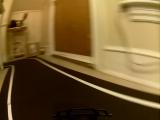

In [168]:
Image(f'{PATH}/{img}')

In [169]:
img2 = df["cam/image_array"][idx2]

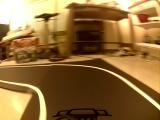

In [170]:
Image(f'{PATH}/{img2}')

In [171]:
import matplotlib.pyplot as plt

In [172]:
# df_steering = pd.DataFrame(df.iloc[idx1:idx2]["pilot/angle"])
df_steering = df[['angle', 'pilot/angle']][idx1:idx2]
df_steering.head()

,angle,pilot/angle
224,-0.857143,-0.285714
225,-0.571429,-0.571429
226,-0.428571,-0.428571
227,-0.285714,-0.285714
228,-0.285714,-0.285714


<Figure size 432x288 with 0 Axes>

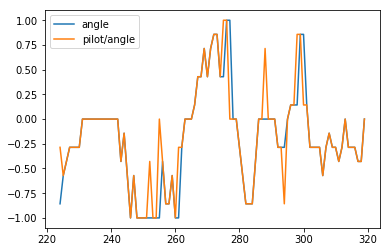

In [173]:
plt.figure(); df_steering.plot()

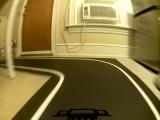

In [82]:
Image(f'{PATH}/{df.iloc[240][2]}')

In [83]:
df.iloc[240]["user/angle"]

0.01

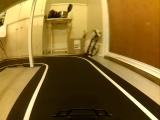

In [88]:
Image(f'{PATH}/{df.iloc[300][2]}')

In [89]:
df.iloc[300]["user/angle"]

0.01

In [90]:
df.iloc[240:300]

,user/throttle,user/angle,cam/image_array
1139,0.34,0.01,1139_cam-image_array_.jpg
1140,0.31,0.00,1140_cam-image_array_.jpg
1141,0.31,0.00,1141_cam-image_array_.jpg
1142,0.31,-0.08,1142_cam-image_array_.jpg
1143,0.31,-0.08,1143_cam-image_array_.jpg
1144,0.29,-0.21,1144_cam-image_array_.jpg
1145,0.29,-0.21,1145_cam-image_array_.jpg
1146,0.29,-0.28,1146_cam-image_array_.jpg
1147,0.29,-0.28,1147_cam-image_array_.jpg
1148,0.30,-0.52,1148_cam-image_array_.jpg


<Figure size 432x288 with 0 Axes>

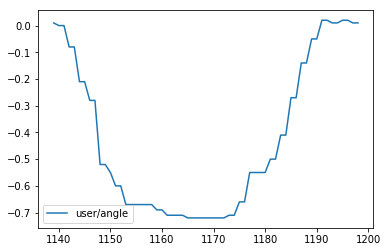

In [91]:
df_steering = pd.DataFrame(df.iloc[240:300]["user/angle"])
plt.figure(); df_steering.plot()

<Figure size 432x288 with 0 Axes>

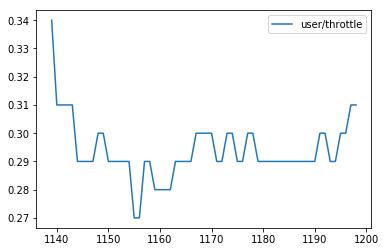

In [92]:
df_throttle = pd.DataFrame(df.iloc[240:300]["user/throttle"])
plt.figure(); df_throttle.plot()